In [45]:
import numpy as np 
from collections import OrderedDict
import matplotlib.pyplot as plt
import pickle as pkl

In [13]:
with open("twoCircuitRandomEncodingCost.pkl", "rb") as f:
    two_encoding = pkl.load(f)

with open("twoCircuitResourceEstimation.pkl", "rb") as f:
    two_data = pkl.load(f)

In [50]:
with open("../../data/encodingCost/oneCircuitEncodingCost.pkl", "rb") as f:
    one_encoding = pkl.load(f)

with open("../../data/oneCircuitResourceEstimation.pkl", "rb") as f:
    one_data = pkl.load(f)

In [51]:
x_one_runtime = []
x_one_ECR = []
y_one = []

# circuit i
for i in list(one_encoding.keys()):
    encoding_data = one_encoding[i]
    resource_data = one_data[i]

    r = resource_data["runtime"]
    x_one_runtime.extend([encoding_data["runtime"][j] + r for j in range(len(encoding_data["runtime"]))])

    ecr = resource_data["count_ops"]['ecr']
    x_one_ECR.extend([encoding_data["count_ops"][j]['ecr'] + ecr for j in range(len(encoding_data["count_ops"]))])

    y_one.extend([i] * len(encoding_data["count_ops"]))

In [32]:
x_two_max_runtime = []
x_two_stream_runtime = []
x_two_vorticity_runtime = []

x_two_max_ECR = []
x_two_stream_ECR = []
x_two_vorticity_ECR = []

y_two = []

# circuit i
for i in list(two_encoding.keys()):
    encoding_data = two_encoding[i]
    resource_data = two_data[i]

    stream_data = resource_data["streamfunction"]
    vorticity_data = resource_data["vorticity"]

    r_stream = stream_data["runtime"]
    r_vorticity = vorticity_data["runtime"]
    r_max = max(r_stream, r_vorticity)

    x_two_max_runtime.extend(
        [encoding_data["runtime"][j] + r_max for j in range(len(encoding_data["runtime"]))]
    )
    x_two_stream_runtime.extend(
        [encoding_data["runtime"][j] + r_stream for j in range(len(encoding_data["runtime"]))]
    )
    x_two_vorticity_runtime.extend(
        [encoding_data["runtime"][j] + r_vorticity for j in range(len(encoding_data["runtime"]))]
    )

    ecr_stream = stream_data["count_ops"]['ecr']
    ecr_vorticity = vorticity_data["count_ops"]['ecr']
    ecr_max = max(ecr_stream, ecr_vorticity)

    x_two_max_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_max for j in range(len(encoding_data["count_ops"]))]
    )
    x_two_stream_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_stream for j in range(len(encoding_data["count_ops"]))]
    )
    x_two_vorticity_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_vorticity for j in range(len(encoding_data["count_ops"]))]
    )

    y_two.extend([i] * len(encoding_data["count_ops"]))

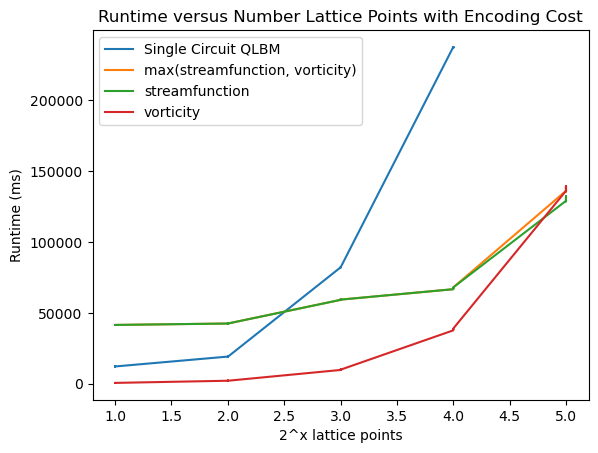

In [52]:
plt.plot(y_one, x_one_runtime, label="Single Circuit QLBM")
plt.plot(y_two, x_two_max_runtime, label="max(streamfunction, vorticity)")
plt.plot(y_two, x_two_stream_runtime, label="streamfunction")
plt.plot(y_two, x_two_vorticity_runtime, label="vorticity")

plt.legend()
plt.ylabel("Runtime (ms)")
plt.xlabel("2^x lattice points")
plt.title("Runtime versus Number Lattice Points with Encoding Cost")
plt.show()

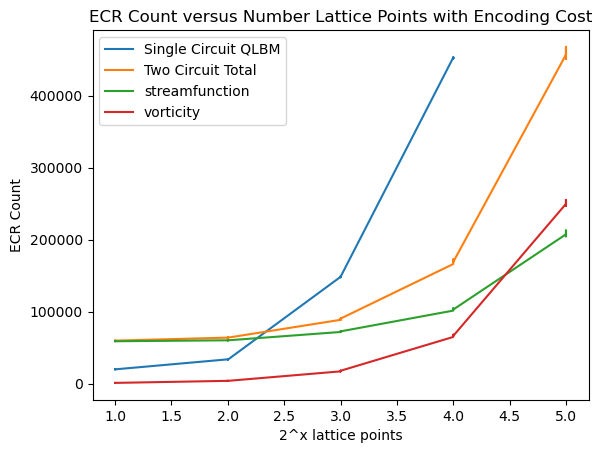

In [53]:
plt.plot(y_one, x_one_ECR, label="Single Circuit QLBM")
plt.plot(y_two, [x_two_stream_ECR[i] + x_two_vorticity_ECR[i] for i in range(len(x_two_vorticity_ECR))], label="Two Circuit Total")
plt.plot(y_two, x_two_stream_ECR, label="streamfunction")
plt.plot(y_two, x_two_vorticity_ECR, label="vorticity")

plt.legend()
plt.ylabel("ECR Count")
plt.xlabel("2^x lattice points")
plt.title("ECR Count versus Number Lattice Points with Encoding Cost")
plt.show()